In [2]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import shapiro, anderson, kstest, norm
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score, root_mean_squared_error

In [2]:
df = pd.read_csv(r'data\train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,90000.0,249.423944,144.336393,0.000000,125.000000,250.000000,374.000000,499.000000
1,90000.0,250.236267,144.022200,0.000000,126.000000,251.000000,375.000000,499.000000
2,90000.0,248.637289,144.107577,0.000000,124.000000,248.000000,374.000000,499.000000
3,90000.0,249.736600,144.284945,0.000000,125.000000,250.000000,375.000000,499.000000
4,90000.0,249.436178,143.941581,0.000000,125.000000,250.000000,373.000000,499.000000
5,90000.0,249.656167,144.329168,0.000000,124.000000,250.000000,374.000000,499.000000
6,90000.0,-0.011402,7.038171,-9.949874,-7.071068,0.000000,7.000000,9.949874
7,90000.0,0.498548,0.288682,0.000014,0.248932,0.497136,0.747513,0.999987
8,90000.0,0.499189,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000
9,90000.0,249.842033,144.612718,0.000000,124.000000,250.000000,376.000000,499.000000


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [8]:
df.nunique()

0           500
1           500
2           500
3           500
4           500
5           500
6           199
7         90000
8             2
9           500
10          500
11          500
12          500
13        90000
14        90000
15        90000
16        90000
17        90000
18        90000
19        90000
20        90000
21        90000
22        90000
23        90000
24        90000
25        90000
26        90000
27        90000
28        90000
29        90000
30        90000
31        90000
32        90000
33        90000
34        90000
35        90000
36        90000
37        90000
38        90000
39        90000
40        90000
41        90000
42        90000
43        90000
44        90000
45        90000
46        90000
47        90000
48        90000
49        90000
50        90000
51        90000
52        90000
target    90000
dtype: int64

In [9]:
amount_of_empty_values = df.isnull().sum()
columns_with_empty_values = amount_of_empty_values[amount_of_empty_values > 0]
columns_with_empty_values

Series([], dtype: int64)

# Feature engineering

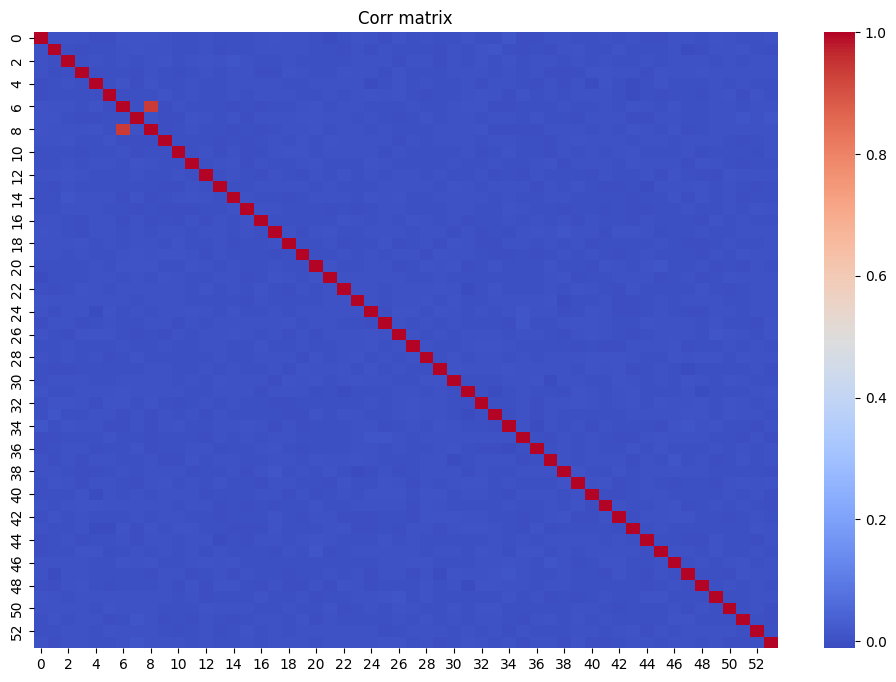

In [10]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Corr matrix")
plt.show()

# Evaluation of two similar features by correlation

In [11]:
df_for_analysis = df[['8', '6']]

for index, row in df_for_analysis.iterrows():
    if row['8'] == 1 and row['6'] < 0:
        print(f"We have example on row: {index} where column 6 with value 1 doesn't mean value greater that zero in column 8.")
    if row['6'] == 0 and row['8'] > 0:
        print(f"We have example on row: {index} where column 6 with value 0 doesn't mean value less that zero in column 8.")

We have example on row: 454 where column 6 with value 0 doesn't mean value less that zero in column 8.
We have example on row: 469 where column 6 with value 0 doesn't mean value less that zero in column 8.
We have example on row: 481 where column 6 with value 0 doesn't mean value less that zero in column 8.
We have example on row: 1049 where column 6 with value 0 doesn't mean value less that zero in column 8.
We have example on row: 1096 where column 6 with value 0 doesn't mean value less that zero in column 8.
We have example on row: 1102 where column 6 with value 0 doesn't mean value less that zero in column 8.
We have example on row: 1145 where column 6 with value 0 doesn't mean value less that zero in column 8.
We have example on row: 1213 where column 6 with value 0 doesn't mean value less that zero in column 8.
We have example on row: 1254 where column 6 with value 0 doesn't mean value less that zero in column 8.
We have example on row: 1439 where column 6 with value 0 doesn't me

# Tree importance

In [16]:
model = ExtraTreesRegressor()

X = df.drop(columns=["target"])
y = df["target"]

model.fit(X, y)

ExtraTreesRegressor()

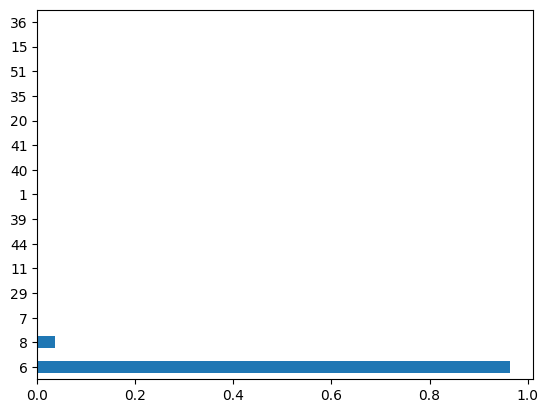

In [28]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(15).plot(kind='barh')
plt.show()

# Outliers

**All columns are not normally distributed, which is why IQR is used to check for outliers, instead of z-score.**

In [12]:
def check_normality_ks(column):
    mean, std = column.mean(), column.std()
    _, p_value = kstest(column.dropna(), 'norm', args=(mean, std))
    if p_value >= 0.05:
        print("Data distribution in column is normal (p-value >= 0.05)\n")

def find_outliers(column):
    
    check_normality_ks(column)

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)].count()

outliers_count = df.apply(find_outliers)

print("Amount of outliers in every column:")
print(outliers_count)

Amount of outliers in every column:
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64


# Feature scaling

In [13]:
df_normalized = df.copy()

scale = Normalizer()

column_names_to_normalize = []
for column_name in df.columns:
    
    if len(df[column_name].unique()) < len(df[column_name]):
        continue
    if df[column_name].dtype == int:
        continue
    if column_name == 'target':
        continue
    
    column_names_to_normalize.append(column_name)

df_normalized[column_names_to_normalize] = scale.fit_transform(df[column_names_to_normalize])

# Categorizal features

In [14]:
category_column_names = []
for column_name in df.columns:
    if len(df[column_name].unique()) < 10:
        category_column_names.append(column_name)

print("Categories:")
print(category_column_names)

Categories:
['8']


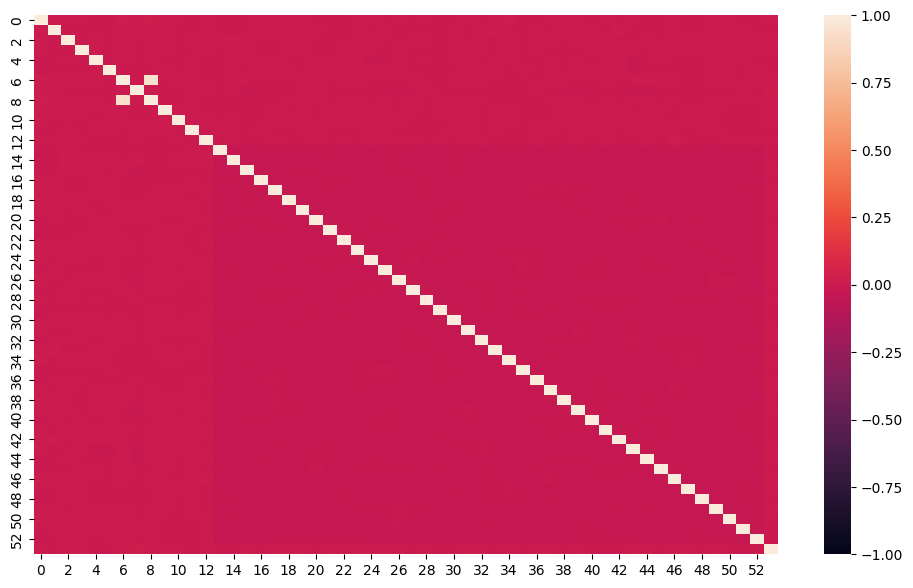

In [15]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_normalized.corr('pearson'), vmin = -1, vmax = 1)
plt.show()

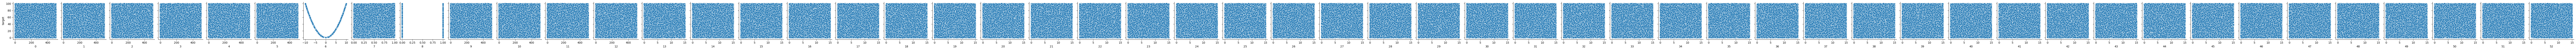

In [16]:
sns.pairplot(df, x_vars=df.columns[:-1], y_vars=['target'])
plt.show()

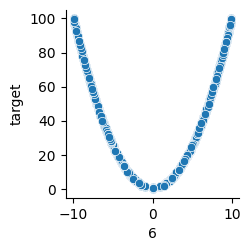

In [18]:
sns.pairplot(df, x_vars=['6'], y_vars=['target'])
plt.show()

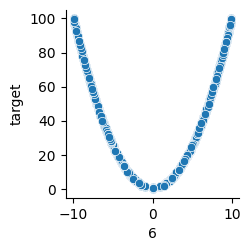

In [19]:
sns.pairplot(df_normalized, x_vars=['6'], y_vars=['target'])
plt.show()

# Model test:

In [3]:
df_predicted_hidden = pd.read_csv(r'data\hidden_test_predicted.csv', index_col=0)

In [4]:
X = df_predicted_hidden['6']
y_pred_h2o = df_predicted_hidden['y_pred_h2o']
y_pred_baseline = df_predicted_hidden['y_pred_baseline']

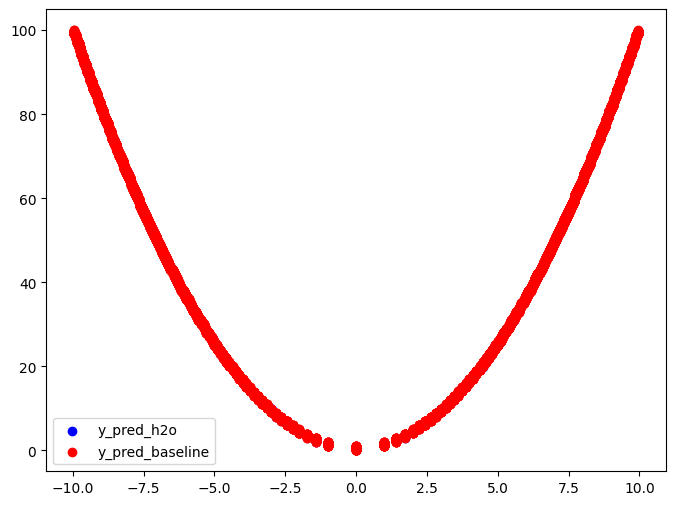

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y_pred_h2o, color='blue', label='y_pred_h2o')
plt.scatter(X, y_pred_baseline, color='red', label='y_pred_baseline')
plt.legend()